# 1. Introduction

- Long short term memory (LSTM) is a model that increases the memory of recurrent neural networks. 

- Recurrent neural networks hold short term memory in that they allow earlier determining information to be employed in the current neural networks. 

- For immediate tasks, the earlier data is used. We may not possess a list of all of the earlier information for the neural node. 

- In RNNs, LSTMs are very widely used in Neural networks. Their effectiveness should be implemented to multiple sequence modelling problems in many application domains like video, NLP, geospatial, and time-series.

- One of the main issues with RNN is the vanishing gradient problem, and it emerges due to the repeated use of the same parameters, in RNN blocks, at each step. 

- We must try to use different parameters to overcome this problem at each time step.We try to find a balance in such a situation. We bring novel parameters at each step while generalizing variable-length sequences and keeping the overall amount of learnable parameters constant. We introduce gated RNN cells like LSTM and GRU.

- Gated cells hold internal variables, which are Gates. This value of each gate at each time step depends on the information at that time step, including early states. 

- The value of the gate then becomes multiplied by the different variables of interest to influence them. Time-series data is a series of data values gathered over time interims, allowing us to trace differences over time. Time-series data can trace progress over milliseconds, days, and years.

- Early, our perspective of time-series data meant more static; the everyday highs and lows under temperature, the opening and closing amount of the stock market. Now we will go to the coding part. We will implement LSTM on the stocks dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Dataset

https://github.com/PacktPublishing/Learning-Pandas-Second-Edition/blob/master/data/goog.csv

# 3. Implementation of LSTM on stocks data

## 3.1 Reading Data

In [3]:
google_stock_data = pd.read_csv(r'C:\Users\HOME\Desktop\GOOG.csv')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


## 3.2 Data Viz

We have performed a few feature extraction here. We take the dates alone from the overall date variable. Now we can be using matplotlib to visualize the available data and see how our price values in data are being displayed. The green colour was used to visualize the open variable for the price-date graph, and for the closing variable, we used red colour.

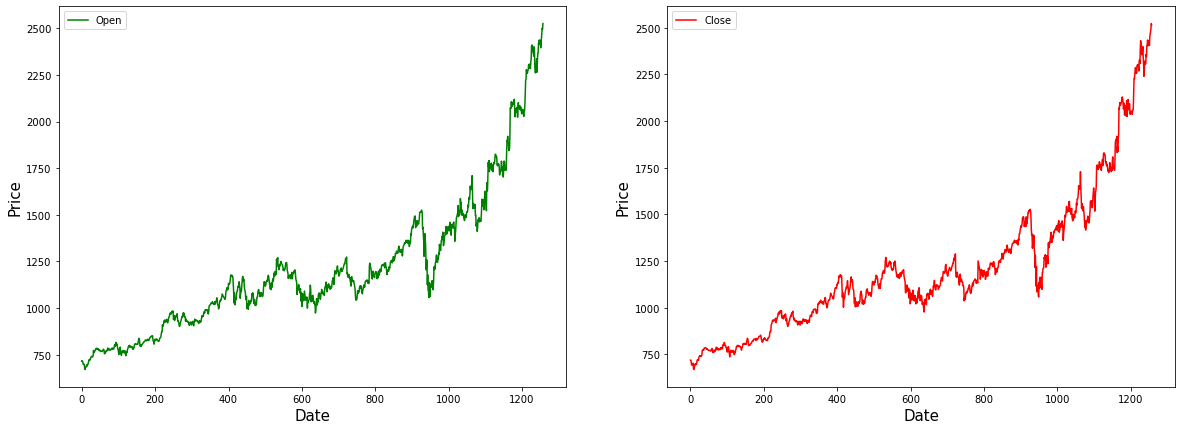

In [4]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

Text(0.5, 1.0, 'High and Low Stock Prices, Google')

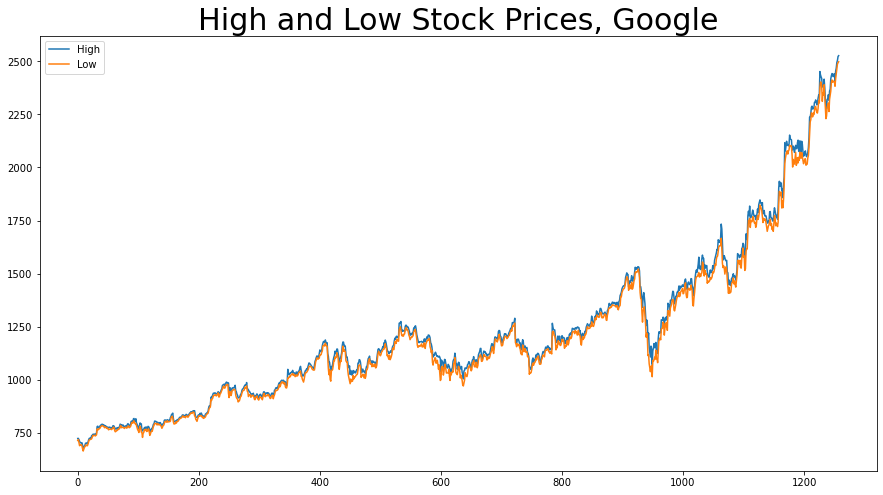

In [5]:
plt.figure(figsize = (15,8))
plt.plot(google_stock_data['high'])
plt.plot(google_stock_data['low'])
plt.legend(['High','Low'])
plt.title('High and Low Stock Prices, Google', fontsize = 30)

Text(0, 0.5, 'High price')

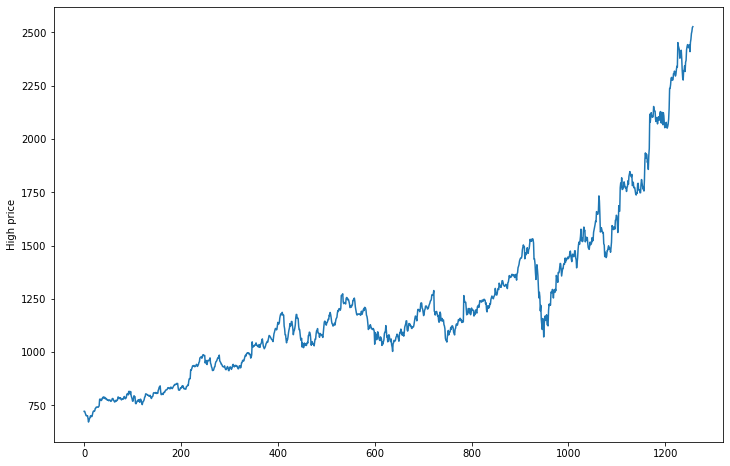

In [6]:
google_stock_data['high'].plot(figsize=(12,8))
plt.ylabel("High price")

Text(0, 0.5, 'Volume price')

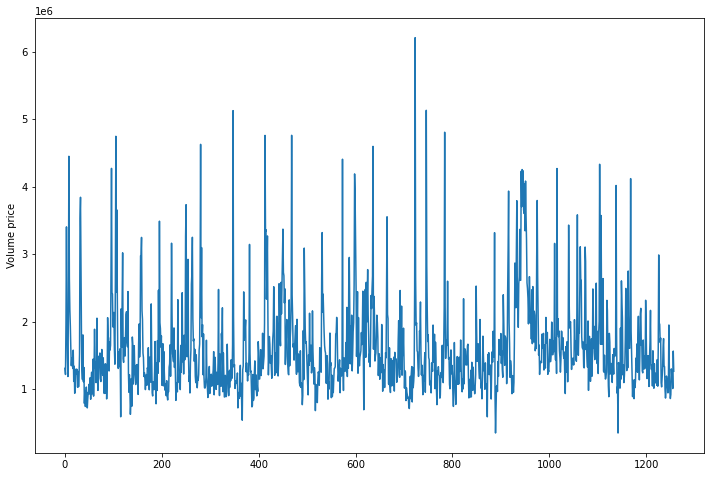

In [7]:
google_stock_data['volume'].plot(figsize=(12,8))
plt.ylabel("Volume price")

## 3.3 Exploring Dataset:

The dataset contains 14 columns associated with time series like the date and the different variables like close, high, low and volume. We will use opening and closing values for our experimentation of time series with LSTM.

In [8]:
google_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [9]:
google_stock_data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [10]:
corr = google_stock_data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,nan,nan
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,nan,nan
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,nan,nan
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,nan,nan
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,nan,nan
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,nan,nan
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,nan,nan
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,nan,nan
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,nan,nan
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,nan,nan


In [11]:
google_stock_data = google_stock_data[['date','open','close']] # Extracting required columns
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


## 3.4 Data Pre-Processing

We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [14]:
google_stock_data.shape

(1258, 2)

In [15]:
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [16]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

## 3.5 Splitting data for training:

In [17]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [18]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [19]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

## 3.6 Implementation of our LSTM model:

In the next step, we create our LSTM model.  In this notebook, we will use the Sequential model imported from Keras and required libraries are imported.

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

We use two LSTM layers in our model and implement drop out in between for regularization. The number of units assigned in the LSTM parameter is fifty. with a dropout of 10 %. Mean squared error is the loss function for optimizing the problem with adam optimizer. Mean absolute error is the metric used in our LSTM network as it is associated with time-series data

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 5s 50ms/step - loss: 0.0071 - mean_absolute_error: 0.0607 - val_loss: 0.0153 - val_mean_absolute_error: 0.1044
Epoch 2/80
30/30 [==============================] - 1s 19ms/step - loss: 9.1178e-04 - mean_absolute_error: 0.0234 - val_loss: 0.0086 - val_mean_absolute_error: 0.0784
Epoch 3/80
30/30 [==============================] - 1s 21ms/step - loss: 5.8543e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0040 - val_mean_absolute_error: 0.0507
Epoch 4/80
30/30 [==============================] - 1s 19ms/step - loss: 5.3339e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0039 - val_mean_absolute_error: 0.0495
Epoch 5/80
30/30 [==============================] - 1s 20ms/step - loss: 5.0984e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0050 - val_mean_absolute_error: 0.0581
Epoch 6/80
30/30 [==============================] - 1s 20ms/step - loss: 4.9189e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0041 - val_mean_absolute_error: 0.0520
Ep

Epoch 50/80
30/30 [==============================] - 1s 20ms/step - loss: 1.9164e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0020 - val_mean_absolute_error: 0.0342
Epoch 51/80
30/30 [==============================] - 1s 20ms/step - loss: 2.1416e-04 - mean_absolute_error: 0.0106 - val_loss: 0.0022 - val_mean_absolute_error: 0.0360
Epoch 52/80
30/30 [==============================] - 1s 20ms/step - loss: 2.1902e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0024 - val_mean_absolute_error: 0.0383
Epoch 53/80
30/30 [==============================] - 1s 21ms/step - loss: 2.1142e-04 - mean_absolute_error: 0.0106 - val_loss: 0.0011 - val_mean_absolute_error: 0.0249
Epoch 54/80
30/30 [==============================] - 1s 20ms/step - loss: 2.1688e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0013 - val_mean_absolute_error: 0.0279
Epoch 55/80
30/30 [==============================] - 1s 20ms/step - loss: 2.0774e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0018 - val_mean_absolute_error:

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

## 3.7 Visualizing predicted and actual data

After fitting the data with our model we use it for prediction. We must use inverse transformation to get back the original value with the transformed function. Now we can use this data to visualize the prediction.

In [ ]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [ ]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [ ]:
gs_slic_data.head()

In [ ]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

In [ ]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## 3.8 Predicting upcoming 10 days

In [ ]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [ ]:
gs_slic_data['2021-06-09':'2021-06-16']

In [ ]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)


In [ ]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()

## 4.Conclusion

In this Notebook, we explored LSTM and stock price using LSTM. We then visualized the opening and closing price value after using LSTM.